In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('NYC0809_with_income.csv')

In [3]:
df.head()

,join_count,target_fid,join_count_1,target_fid_1,field1,cmplnt_num,cmplnt_fr_dt,cmplnt_fr_tm,cmplnt_to_dt,cmplnt_to_tm,...,zipcode_y,number_of_returns,adjusted_gross_income_(agi),avg_agi,number_of_returns_with_total_income,total_income_amount,avg_total_income,number_of_returns_with_taxable_income,taxable_income_amount,avg_taxable_income
0,0,1,0,1,117,686917220,2018-04-18,16:58:00,2019-04-18,17:01:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,2,0,2,157,444236774,2018-07-13,23:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,3,0,3,235,864262100,2018-03-27,22:00:00,2019-04-01,08:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0,4,0,4,313,383311341,2018-11-14,18:00:00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,5,0,5,429,555889431,2018-11-12,08:00:00,2019-03-28,08:00:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['join_count', 'target_fid', 'join_count_1', 'target_fid_1', 'field1',
       'cmplnt_num', 'cmplnt_fr_dt', 'cmplnt_fr_tm', 'cmplnt_to_dt',
       'cmplnt_to_tm', 'addr_pct_cd', 'rpt_dt', 'ky_cd', 'ofns_desc', 'pd_cd',
       'pd_desc', 'crm_atpt_cptd_cd', 'law_cat_cd', 'boro_nm',
       'loc_of_occur_desc', 'prem_typ_desc', 'juris_desc', 'jurisdiction_code',
       'parks_nm', 'hadevelopt', 'housing_psa', 'x_coord_cd', 'y_coord_cd',
       'susp_age_group', 'susp_race', 'susp_sex', 'transit_district',
       'latitude', 'longitude', 'lat_lon', 'patrol_boro', 'station_name',
       'vic_age_group', 'vic_race', 'vic_sex', 'borocode', 'boroname',
       'countyfips', 'ntacode', 'ntaname', 'shape_leng', 'neighborhood',
       'zipcode_x', 'bldgzip', 'po_name', 'population', 'area', 'state_x',
       'county', 'st_fips', 'cty_fips', 'url', 'zipcodes', 'state_y',
       'zipcode_y', 'number_of_returns', 'adjusted_gross_income_(agi)',
       'avg_agi', 'number_of_returns_with_total_inc

In [5]:
df.ofns_desc.unique()

array(['ASSAULT 3 & RELATED OFFENSES', 'MURDER & NON-NEGL. MANSLAUGHTER',
       'HARRASSMENT 2', 'SEX CRIMES', 'PETIT LARCENY', 'GRAND LARCENY',
       'FORGERY', 'RAPE', 'THEFT-FRAUD', 'NYS LAWS-UNCLASSIFIED FELONY',
       'OFF. AGNST PUB ORD SENSBLTY &', 'FELONY ASSAULT', 'ARSON',
       'CRIMINAL TRESPASS', 'CRIMINAL MISCHIEF & RELATED OF', 'BURGLARY',
       'VEHICLE AND TRAFFIC LAWS', 'OFFENSES AGAINST PUBLIC ADMINI',
       'ROBBERY', 'DANGEROUS WEAPONS', 'FRAUDS',
       'MISCELLANEOUS PENAL LAW', 'POSSESSION OF STOLEN PROPERTY',
       'UNAUTHORIZED USE OF A VEHICLE', 'GRAND LARCENY OF MOTOR VEHICLE',
       'INTOXICATED & IMPAIRED DRIVING', 'DANGEROUS DRUGS',
       'PROSTITUTION & RELATED OFFENSES', 'OFFENSES INVOLVING FRAUD',
       'THEFT OF SERVICES', 'OFFENSES AGAINST THE PERSON',
       'ADMINISTRATIVE CODE', 'OTHER OFFENSES RELATED TO THEF',
       'FRAUDULENT ACCOSTING', 'OTHER STATE LAWS (NON PENAL LA',
       'AGRICULTURE & MRKTS LAW-UNCLASSIFIED', "BURGLAR'S TOOLS

In [6]:
df.county.unique()

array([nan, 'New York', 'Queens', 'Bronx', 'Kings', 'Richmond'],
      dtype=object)

## EDA - correlation to neighborhood
---

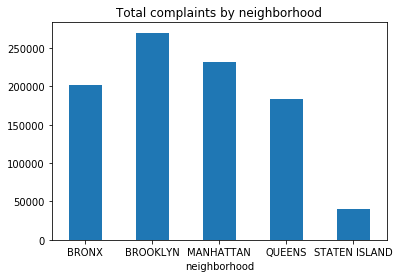

In [7]:
complaints_by_neighborhood = df.groupby('neighborhood').cmplnt_num.count()
complaints_by_neighborhood.plot.bar(rot = 0)
plt.title('Total complaints by neighborhood');

Text(0.5, 1.0, 'Total Population of each Area')

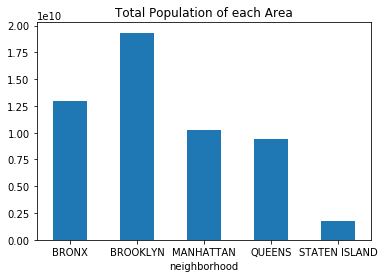

In [8]:
neighborhood_pop = df.groupby('neighborhood').population.sum()
neighborhood_pop.plot.bar(rot = 0)
plt.title('Total Population of each Area')

In [9]:
neighborhood_pop

neighborhood
BRONX            1.293438e+10
BROOKLYN         1.932963e+10
MANHATTAN        1.028522e+10
QUEENS           9.411235e+09
STATEN ISLAND    1.760904e+09
Name: population, dtype: float64

In [10]:
broken_down_complaints = df.groupby(['ofns_desc', 'neighborhood']).cmplnt_num.count()

In [11]:
complaints_df = broken_down_complaints.unstack()

complaints_df

neighborhood,BRONX,BROOKLYN,MANHATTAN,QUEENS,STATEN ISLAND
ofns_desc,,,,,
ABORTION,1.0,NaN,NaN,NaN,NaN
ADMINISTRATIVE CODE,687.0,595.0,275.0,500.0,79.0
AGRICULTURE & MRKTS LAW-UNCLASSIFIED,70.0,68.0,61.0,55.0,20.0
ALCOHOLIC BEVERAGE CONTROL LAW,51.0,130.0,16.0,18.0,1.0
ANTICIPATORY OFFENSES,2.0,3.0,4.0,3.0,NaN
...,...,...,...,...,...
THEFT OF SERVICES,153.0,104.0,508.0,102.0,NaN
THEFT-FRAUD,760.0,2136.0,2714.0,1839.0,512.0
UNAUTHORIZED USE OF A VEHICLE,458.0,1104.0,371.0,1208.0,157.0


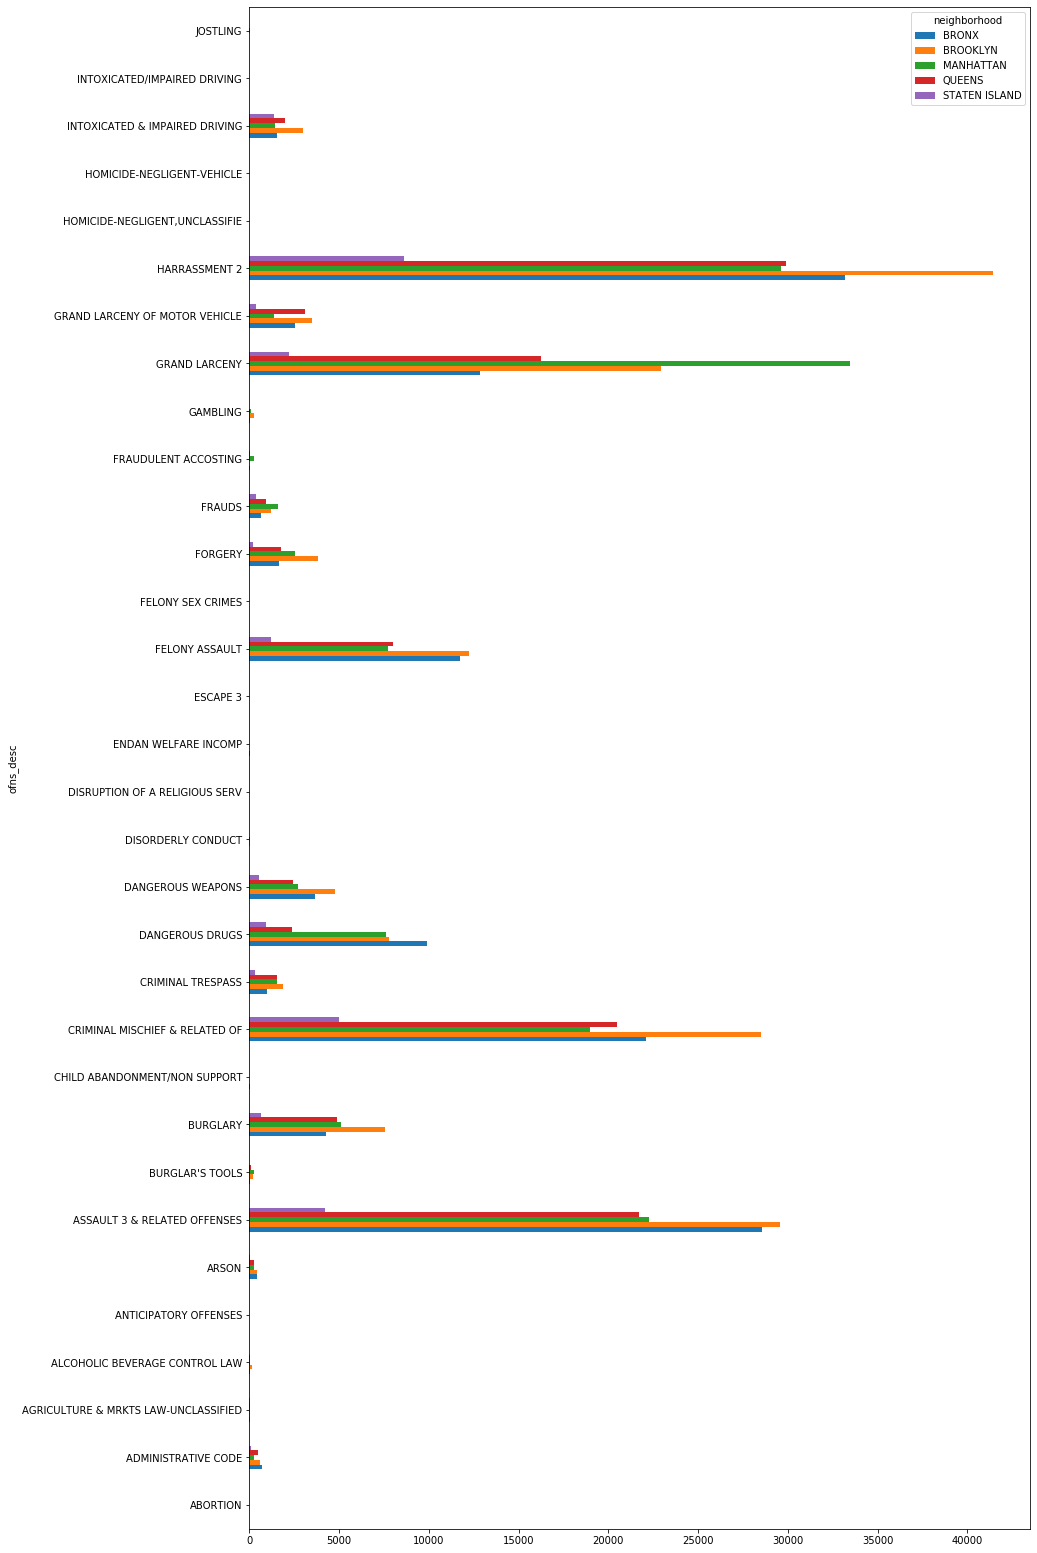

In [12]:
complaints_df[:len(complaints_df) // 2].plot.barh(figsize = (14,28), rot = 0)

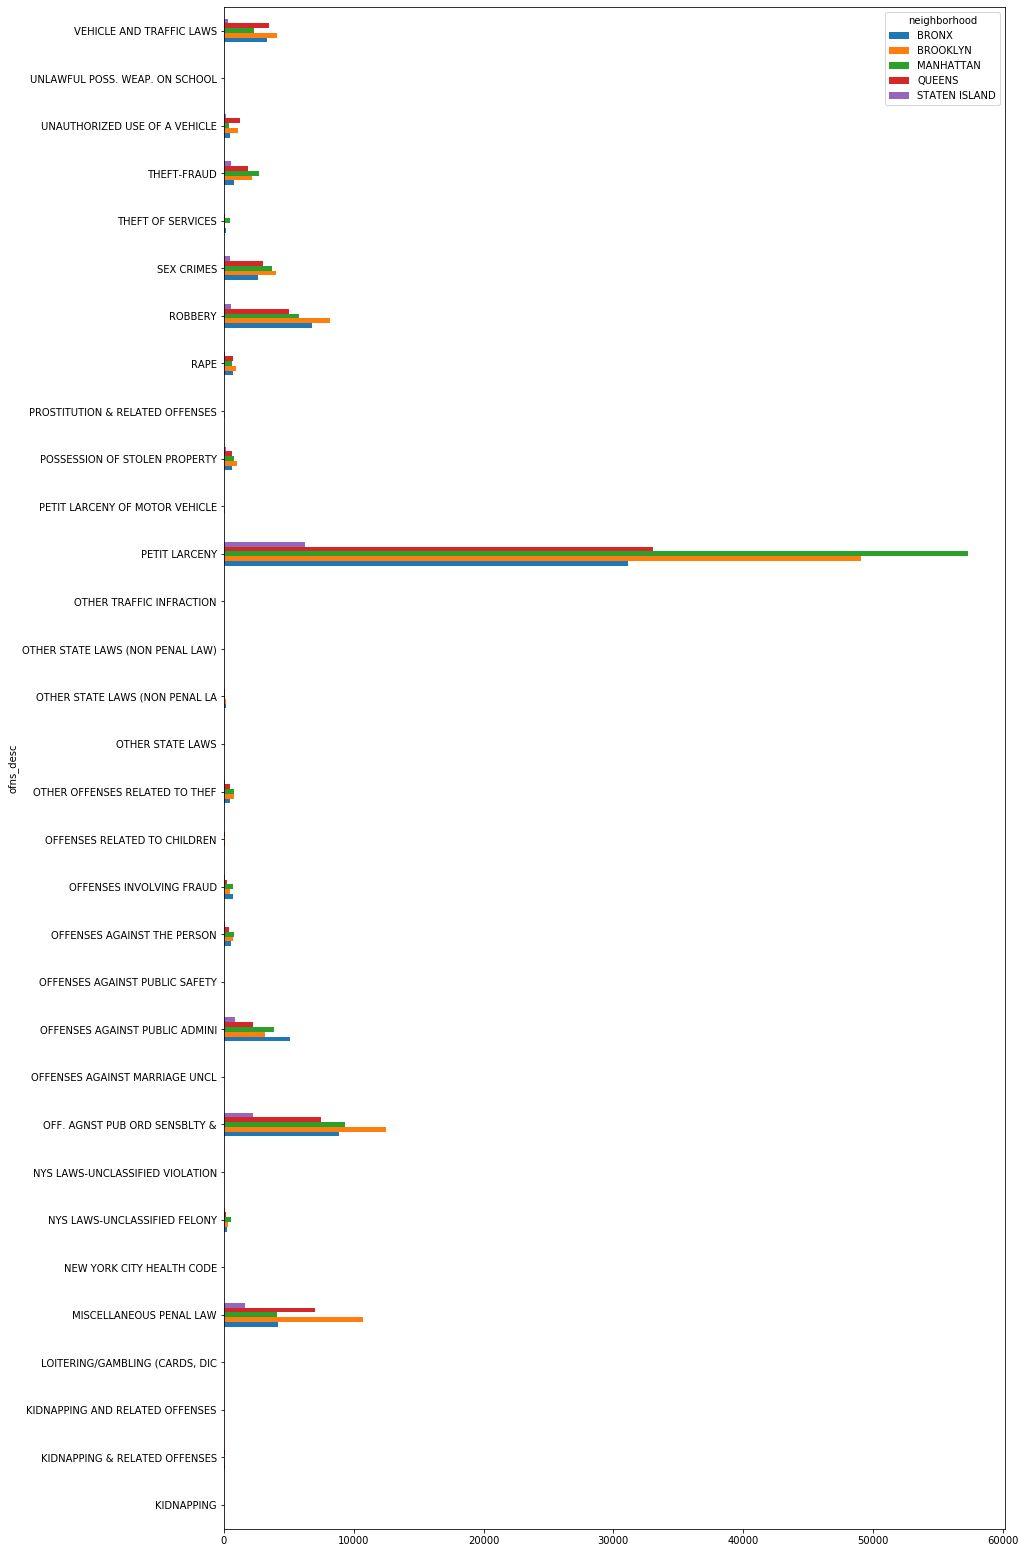

In [13]:
complaints_df[len(complaints_df) // 2:].plot.barh(figsize = (14,28), rot = 0)

In [14]:
df.population.describe()

count    923088.000000
mean      58238.865280
std       24863.943426
min           0.000000
25%       38665.000000
50%       57989.000000
75%       78060.000000
max      109069.000000
Name: population, dtype: float64